In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# fig, ax = plt.subplots()
# ax.axis('off')
G = nx.Graph()  # an undirected graph object

for i in range(6): G.add_node(i + 1)

G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(3, 1)
G.add_edge(3, 2)
G.add_edge(4, 5)
G.add_edge(4, 6)
G.add_edge(5, 4)
G.add_edge(5, 6)
G.add_edge(6, 4)
G.add_edge(3, 5)
spring_layout_for_G = nx.spring_layout(G, seed=100) # position of nodes not random
# nx.draw_networkx(G, pos=spring_layout_for_G)
# fig.savefig('./plots/Simple_pagerank_G.png', format='PNG')

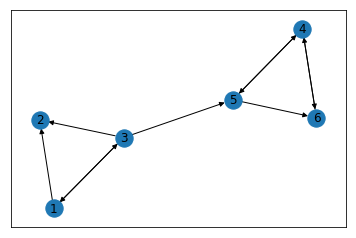

In [3]:
fig2, ax = plt.subplots()
# ax.axis('off')
G = nx.DiGraph()  # a directed graph object
for i in range(6): G.add_node(i + 1)

G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(3, 1)
G.add_edge(3, 2)
G.add_edge(4, 5)
G.add_edge(4, 6)
G.add_edge(5, 4)
G.add_edge(5, 6)
G.add_edge(6, 4)
G.add_edge(3, 5)
nx.draw_networkx(G, pos=spring_layout_for_G)
# fig2.savefig('./plots/Simple_pagerank_DiGraph.png', format='PNG')

In [18]:
H = nx.adjacency_matrix(G).astype(float)
out_degree_for_nodes_of_G = G.out_degree
for i, j in zip(H.nonzero()[0], H.nonzero()[1]):
    try:
        H[i, j] = 1. / out_degree_for_nodes_of_G[i + 1]
    except ZeroDivisionError:
        print("non zero elements appear to be zero")

In [12]:
# zero_indexes = np.where(H.getnnz(1)==0)
# for i in zero_indexes[0]:
#     # print(i)
#     # print()
#     for j in range(H.shape[1]):
#         # print(H[i, j])
#         H[i,j] = 1.0/H.shape[1]
#         # print( 1.0/H.shape[1])
#     # print()

In [13]:
# H

In [14]:
# H.todense()

In [19]:
alphas = np.zeros(H.shape[0])
zero_indexes = np.where(H.getnnz(1)==0)
for i in zero_indexes[0]:
    alphas[i] = 1.0
alphas

array([0., 1., 0., 0., 0., 0.])

In [20]:
epsilons = np.ones(H.shape[0])/H.shape[0]
epsilons

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [21]:
H + np.dot(alphas[:,None],epsilons[None,:])

matrix([[0.        , 0.5       , 0.5       , 0.        , 0.        ,
         0.        ],
        [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
         0.16666667],
        [0.33333333, 0.33333333, 0.        , 0.        , 0.33333333,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.5       ,
         0.5       ],
        [0.        , 0.        , 0.        , 0.5       , 0.        ,
         0.5       ],
        [0.        , 0.        , 0.        , 1.        , 0.        ,
         0.        ]])

array([[0.16666667],
       [0.16666667],
       [0.16666667],
       [0.16666667],
       [0.16666667],
       [0.16666667]])

In [25]:
alphas.shape

(6,)

array([[0., 1., 0., 0., 0., 0.]])